# Creating a MVP for a Song Recommendation Tool 

### Step 1: Scrape the data to be used as reference for the model

In [1]:

import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [2]:
url = "https://www.billboard.com/charts/hot-100/"


In [3]:
response = requests.get(url)
top100=BeautifulSoup(response.content,'html.parser')


In [4]:
top100.select('span.c-label.a-font-primary-s')[0].get_text(strip=True)


'Adele'

In [5]:
top100.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)


'Easy On Me'

In [6]:
top_100 = len(top100.select('h3.c-title.a-no-trucate'))


In [7]:

song = []
artist = []

for i in tqdm(range(top_100)):
    song.append(top100.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artist.append(top100.select('span.c-label.a-font-primary-s')[i].get_text(strip=True))
    
    
   

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
 top100_table = pd.DataFrame({'song':song, 'artist':artist})
top100_table

,song,artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,All Too Well (Taylor's Version),Taylor Swift
4,Oh My God,Adele
...,...,...
95,Too Easy,Gunna & Future
96,Escape Plan,Travis Scott
97,Who's In Your Head,Jonas Brothers
98,Jugaste y Sufri,Eslabon Armado Featuring DannyLux


### Step 2: Build the Recommender

In [9]:
#creating the user input 
song = input("Search here for a song! ").lower()

Search here for a song! love


In [10]:
#Checking if the input is actually in the data frame

check = top100_table[top100_table['song'].str.lower().str.contains(song)]
check

,song,artist
22,My Little Love,Adele
27,If I Didn't Love You,Jason Aldean & Carrie Underwood
31,To Be Loved,Adele
36,Love Nwantiti (Ah Ah Ah),CKay
55,Love Is A Game,Adele
65,No Love,Summer Walker & SZA


In [11]:
#assign the relevant index number to list for later string-operations, model identifies song names through index

index = check.index.tolist()

In [12]:
top100_table.song[index].values[0]

'My Little Love'

In [13]:
# check if a value has been returned in the input or not - (is the value in our dataframe or not)
if len(check) == 0:
    print("That ain't it chief, try again..")
else: # in case the song was spelt in correctly, confirm the song name
    answer = input("Did you mean "+ top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + "? ")
        
    if answer.lower() == 'yes':
        suggestion = top100_table.sample().index.tolist()
        print("Well you got good taste alright! Here's another banger you might like called " + top100_table['song'][suggestion].item() + " by " +  top100_table['artist'][suggestion].item())
    else: 
        print ("I got nothing else for you, you should be dissapointed.. " )
        
        



  

Did you mean My Little Love by Adele? yes
Well you got good taste alright! Here's another banger you might like called Woman Like Me by Adele


### Breaking each step down 

In [14]:
#step 1: create user input: 

song = input("Enter your song here  ").lower()




# converting input to lowercase to standardize it 

Enter your song here  baby


In [15]:
#step 2: create a check field to find if the user input is in the dataframe, if not? 

mic_check = top100_table[top100_table['song'].str.lower().str.contains(song)]
mic_check


# need to add str since lower only works if the value is a string, 
#the outer[] is to return the exact value and not a list of true and false
#contains makes sure we are working on the user input

,song,artist
2,Industry Baby,Lil Nas X & Jack Harlow


In [16]:
#Step 3: Assign the values an index so the recommender can return the names later based on that. 

index = mic_check.index.to_list()

#to_list converts values into a list so we can work with it later

In [17]:
#Step 4: Create value to return the required songs - that we will use in the actual recommender code

top100_table.song[index].values[0]

'Industry Baby'

In [18]:
mic_check

,song,artist
2,Industry Baby,Lil Nas X & Jack Harlow


In [20]:
#Step 5: Create scenarios for each input 

while True: 
        song = input("Enter your song here: ").lower()
        mic_check = top100_table[top100_table['song'].str.lower().str.contains(song)]
        index = mic_check.index.to_list()
        top100_table.song[index].values[0]

        if len(mic_check) == 0:
                 print("That ain't it chief, try again")
        else: 
            answer=input("I think we're onto something, did you mean " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + "? ")
  
            if answer.lower() == "yes":
                suggestion=top100_table.sample().index.to_list()
                print("Seems like you got good taste in music! Try this song out by " + top100_table['artist'][suggestion].item() + " it's called " + top100_table['song'][suggestion].item())
                break
            else: 
                input("Ok, let's try that again now ")
              

Enter your song here: baby
I think we're onto something, did you mean Industry Baby by Lil Nas X & Jack Harlow? yes
Seems like you got good taste in music! Try this song out by Billie Eilish it's called Happier Than Ever


In [21]:

while True: 
        song = input("Enter your song here: ").lower()
        mic_check = top100_table[top100_table['song'].str.lower().str.contains(song)]
        index = mic_check.index.to_list()
        top100_table.song[index].values[0]

        if len(mic_check) == 0:
                 print("That ain't it chief, try again")
                 continue
        else: 
            answer=input("I think we're onto something, did you mean " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + "? ")
  
            if answer.lower() == "yes":
                suggestion=top100_table.sample().index.to_list()
                print("Seems like you got good taste in music! Try this song out by " + top100_table['artist'][suggestion].item() + " it's called " + top100_table['song'][suggestion].item())
                break
            else: 
                input("Ok, let's try that again now ")

Enter your song here: baby
I think we're onto something, did you mean Industry Baby by Lil Nas X & Jack Harlow? yes
Seems like you got good taste in music! Try this song out by Jonas Brothers it's called Who's In Your Head


In [22]:
len(mic_check)

1

## Getting song data from Spotify

In [23]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [24]:
import getpass

In [25]:
# inputting our spotify id & secret in an encrypted way
client_id = str(getpass.getpass('client_id?'))
client_secret=str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [26]:
#embedding getpass credentials in the access key
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

#### Choosing a playlist

In [27]:
playlist=sp.user_playlist_tracks("SunSubiroRecords","3xMQTDLOIGvj3lWH5e5x6F")



In [28]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [29]:
playlist["items"][2].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [30]:
playlist["items"][2]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [31]:
def get_playlist_tracks(user_id,playlist_id):
    results=sp.user_playlist_tracks(user_id,playlist_id)
    tracks=results["items"]
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [32]:
playlist=sp.user_playlist_tracks("SunSubiroRecords","3xMQTDLOIGvj3lWH5e5x6F")

results2=get_playlist_tracks("SunSubiroRecords","3xMQTDLOIGvj3lWH5e5x6F")


In [33]:
len(results2)

689

In [34]:
results2[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [35]:
results2[0]['track']["uri"].rsplit(':',1)

['spotify:track', '5PjdY0CKGZdEuoNab3yDmX']

In [36]:
results2[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [37]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results2

In [38]:
for r in results2:
    song_URI.append(r['track']['uri'])

In [39]:
for r in results2:
    song_ID.append(r['track']['id'])

In [40]:
for r in results2:
    song_name.append(r['track']['name'])

In [41]:
for r in results2: 
    song_artist.append(r['track']['artists'][0]['name'])

In [42]:
import pandas as pd
playlist_song_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [43]:
playlist_song_info

,song_name,song_ID,song_artist
0,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,The Kid LAROI
1,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,Adele
2,INDUSTRY BABY (feat. Jack Harlow),5Z9KJZvQzH6PFmb8SNkxuk,Lil Nas X
3,More Than You Know,2yaZGI4MWkdCGmkTWYHW6u,Filip Nordin
4,abcdefu,4fouWK6XVHhzl78KzQ1UjL,GAYLE
...,...,...,...
684,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture
685,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene
686,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene
687,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene


In [44]:
feats = sp.audio_features(tracks=song_ID[0:99])

In [45]:
from tqdm.notebook import tqdm
audio_features = []
for song_ID in tqdm(range(len(playlist_song_info))):
    audio_features.extend(sp.audio_features(tracks=playlist_song_info['song_ID'][song_ID]))

  0%|          | 0/689 [00:00<?, ?it/s]

In [46]:
audio_features_df = pd.DataFrame(audio_features) 


In [47]:
names_audio_features_df = pd.merge(playlist_song_info, audio_features_df, left_on='song_ID',right_on='id', how='inner')

### Adding another playlist

In [48]:
playlist1=sp.user_playlist_tracks("Francisco_José_Carvalho","6BZypSVg53OPbx8iV7v2XC")


def get_playlist_tracks(user_id,playlist_id):
    results=sp.user_playlist_tracks(user_id,playlist_id)
    tracks=results["items"]
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


results2=get_playlist_tracks("Francisco_José_Carvalho","6BZypSVg53OPbx8iV7v2XC")



In [49]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results2

In [50]:
for r in results2:
    song_URI.append(r['track']['uri'])

In [51]:
for r in results2:
    song_ID.append(r['track']['id'])

In [52]:
for r in results2:
    song_name.append(r['track']['name'])

In [53]:
for r in results2: 
    song_artist.append(r['track']['artists'][0]['name'])

In [54]:
import pandas as pd
playlist_song_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [55]:
audio_features1 = []
for song_ID in tqdm(range(len(playlist_song_info))):
    audio_features1.extend(sp.audio_features(tracks=playlist_song_info['song_ID'][song_ID]))

  0%|          | 0/700 [00:00<?, ?it/s]

In [56]:
audio_features_df1 = pd.DataFrame(audio_features1) 


In [57]:
names_audio_features_df2 = pd.merge(playlist_song_info, audio_features_df1, left_on='song_ID',right_on='id', how='inner')

In [58]:
names_audio_features_df = pd.concat([names_audio_features_df2,names_audio_features_df])

In [59]:
names_audio_features_df


,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.7600,0,-4.706,1,0.3420,0.073300,...,0.0865,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5
1,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.4820,6,-8.917,0,0.0402,0.026600,...,0.1060,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4
2,Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.7480,5,-4.124,1,0.0619,0.030500,...,0.3430,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
3,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.4840,9,-9.110,0,0.0308,0.000334,...,0.0912,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3
4,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.8360,5,-4.336,0,0.0444,0.145000,...,0.1160,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture,0.747,0.2400,6,-12.393,1,0.0407,0.919000,...,0.1250,0.399,115.965,audio_features,4oWy1Rx027Xj55EdK9qCgM,spotify:track:4oWy1Rx027Xj55EdK9qCgM,https://api.spotify.com/v1/tracks/4oWy1Rx027Xj...,https://api.spotify.com/v1/audio-analysis/4oWy...,132425,4
685,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene,0.608,0.1500,11,-12.729,1,0.0321,0.863000,...,0.1240,0.434,81.988,audio_features,0NiZ9lc9y6CZqaFYwsUL9c,spotify:track:0NiZ9lc9y6CZqaFYwsUL9c,https://api.spotify.com/v1/tracks/0NiZ9lc9y6CZ...,https://api.spotify.com/v1/audio-analysis/0NiZ...,126951,4
686,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene,0.505,0.0974,7,-14.228,1,0.0331,0.886000,...,0.1180,0.345,151.449,audio_features,5gQu2dp4DIcgEDWnrZblrN,spotify:track:5gQu2dp4DIcgEDWnrZblrN,https://api.spotify.com/v1/tracks/5gQu2dp4DIcg...,https://api.spotify.com/v1/audio-analysis/5gQu...,142105,4
687,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene,0.579,0.1620,9,-11.063,1,0.0577,0.908000,...,0.1950,0.615,159.858,audio_features,1cfLUa6FPK2Oie3W6Sa7rb,spotify:track:1cfLUa6FPK2Oie3W6Sa7rb,https://api.spotify.com/v1/tracks/1cfLUa6FPK2O...,https://api.spotify.com/v1/audio-analysis/1cfL...,130312,4


In [60]:
names_audio_features_df


,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.7600,0,-4.706,1,0.3420,0.073300,...,0.0865,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5
1,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.4820,6,-8.917,0,0.0402,0.026600,...,0.1060,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4
2,Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.7480,5,-4.124,1,0.0619,0.030500,...,0.3430,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
3,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.4840,9,-9.110,0,0.0308,0.000334,...,0.0912,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3
4,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.8360,5,-4.336,0,0.0444,0.145000,...,0.1160,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture,0.747,0.2400,6,-12.393,1,0.0407,0.919000,...,0.1250,0.399,115.965,audio_features,4oWy1Rx027Xj55EdK9qCgM,spotify:track:4oWy1Rx027Xj55EdK9qCgM,https://api.spotify.com/v1/tracks/4oWy1Rx027Xj...,https://api.spotify.com/v1/audio-analysis/4oWy...,132425,4
685,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene,0.608,0.1500,11,-12.729,1,0.0321,0.863000,...,0.1240,0.434,81.988,audio_features,0NiZ9lc9y6CZqaFYwsUL9c,spotify:track:0NiZ9lc9y6CZqaFYwsUL9c,https://api.spotify.com/v1/tracks/0NiZ9lc9y6CZ...,https://api.spotify.com/v1/audio-analysis/0NiZ...,126951,4
686,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene,0.505,0.0974,7,-14.228,1,0.0331,0.886000,...,0.1180,0.345,151.449,audio_features,5gQu2dp4DIcgEDWnrZblrN,spotify:track:5gQu2dp4DIcgEDWnrZblrN,https://api.spotify.com/v1/tracks/5gQu2dp4DIcg...,https://api.spotify.com/v1/audio-analysis/5gQu...,142105,4
687,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene,0.579,0.1620,9,-11.063,1,0.0577,0.908000,...,0.1950,0.615,159.858,audio_features,1cfLUa6FPK2Oie3W6Sa7rb,spotify:track:1cfLUa6FPK2Oie3W6Sa7rb,https://api.spotify.com/v1/tracks/1cfLUa6FPK2O...,https://api.spotify.com/v1/audio-analysis/1cfL...,130312,4


### Final Merged Data Frame

In [61]:
names_audio_features_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.7600,0,-4.706,1,0.3420,0.073300,...,0.0865,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5
1,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.4820,6,-8.917,0,0.0402,0.026600,...,0.1060,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4
2,Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.7480,5,-4.124,1,0.0619,0.030500,...,0.3430,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
3,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.4840,9,-9.110,0,0.0308,0.000334,...,0.0912,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3
4,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.8360,5,-4.336,0,0.0444,0.145000,...,0.1160,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture,0.747,0.2400,6,-12.393,1,0.0407,0.919000,...,0.1250,0.399,115.965,audio_features,4oWy1Rx027Xj55EdK9qCgM,spotify:track:4oWy1Rx027Xj55EdK9qCgM,https://api.spotify.com/v1/tracks/4oWy1Rx027Xj...,https://api.spotify.com/v1/audio-analysis/4oWy...,132425,4
685,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene,0.608,0.1500,11,-12.729,1,0.0321,0.863000,...,0.1240,0.434,81.988,audio_features,0NiZ9lc9y6CZqaFYwsUL9c,spotify:track:0NiZ9lc9y6CZqaFYwsUL9c,https://api.spotify.com/v1/tracks/0NiZ9lc9y6CZ...,https://api.spotify.com/v1/audio-analysis/0NiZ...,126951,4
686,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene,0.505,0.0974,7,-14.228,1,0.0331,0.886000,...,0.1180,0.345,151.449,audio_features,5gQu2dp4DIcgEDWnrZblrN,spotify:track:5gQu2dp4DIcgEDWnrZblrN,https://api.spotify.com/v1/tracks/5gQu2dp4DIcg...,https://api.spotify.com/v1/audio-analysis/5gQu...,142105,4
687,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene,0.579,0.1620,9,-11.063,1,0.0577,0.908000,...,0.1950,0.615,159.858,audio_features,1cfLUa6FPK2Oie3W6Sa7rb,spotify:track:1cfLUa6FPK2Oie3W6Sa7rb,https://api.spotify.com/v1/tracks/1cfLUa6FPK2O...,https://api.spotify.com/v1/audio-analysis/1cfL...,130312,4


In [62]:
names_audio_features_df.index=names_audio_features_df.iloc[:,0]


In [63]:
names_audio_features_df.rename_axis(None,inplace=True)

In [64]:
names_audio_features_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
No Brainer,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.7600,0,-4.706,1,0.3420,0.073300,...,0.0865,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5
Magic,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.4820,6,-8.917,0,0.0402,0.026600,...,0.1060,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4
Heroes (we could be),Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.7480,5,-4.124,1,0.0619,0.030500,...,0.3430,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4
The House of the Rising Sun,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.4840,9,-9.110,0,0.0308,0.000334,...,0.0912,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3
Mayores,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.8360,5,-4.336,0,0.0444,0.145000,...,0.1160,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Child O' Mine,Sweet Child O' Mine,4oWy1Rx027Xj55EdK9qCgM,Covers Culture,0.747,0.2400,6,-12.393,1,0.0407,0.919000,...,0.1250,0.399,115.965,audio_features,4oWy1Rx027Xj55EdK9qCgM,spotify:track:4oWy1Rx027Xj55EdK9qCgM,https://api.spotify.com/v1/tracks/4oWy1Rx027Xj...,https://api.spotify.com/v1/audio-analysis/4oWy...,132425,4
Canada,Canada,0NiZ9lc9y6CZqaFYwsUL9c,Bobbylene,0.608,0.1500,11,-12.729,1,0.0321,0.863000,...,0.1240,0.434,81.988,audio_features,0NiZ9lc9y6CZqaFYwsUL9c,spotify:track:0NiZ9lc9y6CZqaFYwsUL9c,https://api.spotify.com/v1/tracks/0NiZ9lc9y6CZ...,https://api.spotify.com/v1/audio-analysis/0NiZ...,126951,4
Maybe It's Time,Maybe It's Time,5gQu2dp4DIcgEDWnrZblrN,Bobbylene,0.505,0.0974,7,-14.228,1,0.0331,0.886000,...,0.1180,0.345,151.449,audio_features,5gQu2dp4DIcgEDWnrZblrN,spotify:track:5gQu2dp4DIcgEDWnrZblrN,https://api.spotify.com/v1/tracks/5gQu2dp4DIcg...,https://api.spotify.com/v1/audio-analysis/5gQu...,142105,4
Ivy,Ivy,1cfLUa6FPK2Oie3W6Sa7rb,Bobbylene,0.579,0.1620,9,-11.063,1,0.0577,0.908000,...,0.1950,0.615,159.858,audio_features,1cfLUa6FPK2Oie3W6Sa7rb,spotify:track:1cfLUa6FPK2Oie3W6Sa7rb,https://api.spotify.com/v1/tracks/1cfLUa6FPK2O...,https://api.spotify.com/v1/audio-analysis/1cfL...,130312,4


In [65]:
import numpy as np
df=names_audio_features_df.select_dtypes([np.number])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
No Brainer,0.552,0.7600,0,-4.706,1,0.3420,0.073300,0.000000,0.0865,0.639,135.702,260000,5
Magic,0.738,0.4820,6,-8.917,0,0.0402,0.026600,0.621000,0.1060,0.352,93.457,285014,4
Heroes (we could be),0.503,0.7480,5,-4.124,1,0.0619,0.030500,0.000000,0.3430,0.356,125.896,210013,4
The House of the Rising Sun,0.316,0.4840,9,-9.110,0,0.0308,0.000334,0.004450,0.0912,0.299,117.363,269907,3
Mayores,0.745,0.8360,5,-4.336,0,0.0444,0.145000,0.003140,0.1160,0.874,96.993,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Child O' Mine,0.747,0.2400,6,-12.393,1,0.0407,0.919000,0.000000,0.1250,0.399,115.965,132425,4
Canada,0.608,0.1500,11,-12.729,1,0.0321,0.863000,0.000000,0.1240,0.434,81.988,126951,4
Maybe It's Time,0.505,0.0974,7,-14.228,1,0.0331,0.886000,0.000000,0.1180,0.345,151.449,142105,4
Ivy,0.579,0.1620,9,-11.063,1,0.0577,0.908000,0.000000,0.1950,0.615,159.858,130312,4


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import datasets

In [67]:
names_audio_features_df.columns.get_loc("tempo")


13

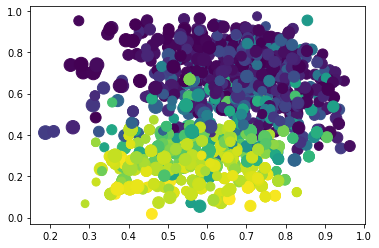

In [68]:
plt.scatter(names_audio_features_df.iloc[:,3],
            names_audio_features_df.iloc[:,4],
            names_audio_features_df.iloc[:,13],
            names_audio_features_df.iloc[:,9])

In [69]:
df=names_audio_features_df.select_dtypes([np.number])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
No Brainer,0.552,0.7600,0,-4.706,1,0.3420,0.073300,0.000000,0.0865,0.639,135.702,260000,5
Magic,0.738,0.4820,6,-8.917,0,0.0402,0.026600,0.621000,0.1060,0.352,93.457,285014,4
Heroes (we could be),0.503,0.7480,5,-4.124,1,0.0619,0.030500,0.000000,0.3430,0.356,125.896,210013,4
The House of the Rising Sun,0.316,0.4840,9,-9.110,0,0.0308,0.000334,0.004450,0.0912,0.299,117.363,269907,3
Mayores,0.745,0.8360,5,-4.336,0,0.0444,0.145000,0.003140,0.1160,0.874,96.993,203187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Child O' Mine,0.747,0.2400,6,-12.393,1,0.0407,0.919000,0.000000,0.1250,0.399,115.965,132425,4
Canada,0.608,0.1500,11,-12.729,1,0.0321,0.863000,0.000000,0.1240,0.434,81.988,126951,4
Maybe It's Time,0.505,0.0974,7,-14.228,1,0.0331,0.886000,0.000000,0.1180,0.345,151.449,142105,4
Ivy,0.579,0.1620,9,-11.063,1,0.0577,0.908000,0.000000,0.1950,0.615,159.858,130312,4


## Scaling before clustering

In [70]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
No Brainer,0.552,0.760,0,-4.706,1,0.3420,0.073300,0.00000,0.0865,0.639,135.702,260000,5
Magic,0.738,0.482,6,-8.917,0,0.0402,0.026600,0.62100,0.1060,0.352,93.457,285014,4
Heroes (we could be),0.503,0.748,5,-4.124,1,0.0619,0.030500,0.00000,0.3430,0.356,125.896,210013,4
The House of the Rising Sun,0.316,0.484,9,-9.110,0,0.0308,0.000334,0.00445,0.0912,0.299,117.363,269907,3
Mayores,0.745,0.836,5,-4.336,0,0.0444,0.145000,0.00314,0.1160,0.874,96.993,203187,4


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
df_scaled = StandardScaler().fit_transform(df)

In [73]:
df_scaled.shape

(1389, 13)

In [74]:
df_scaled_df = pd.DataFrame(df_scaled,columns=['danceability','energy','key','loudness','mod','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature'])

In [75]:
df_scaled_df.head()

,danceability,energy,key,loudness,mod,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.609178,1.177013,-1.521819,0.880334,0.741770,3.698407,-1.091965,-0.148678,-0.675160,0.788409,0.597586,1.296300,2.320390
1,0.733204,-0.013189,0.177155,-0.259119,-1.348126,-0.436262,-1.222019,11.104402,-0.517890,-0.611426,-0.872504,1.804708,0.187351
2,-0.962816,1.125638,-0.106007,1.037817,0.741770,-0.138971,-1.211158,-0.148678,1.393534,-0.591916,0.256346,0.280317,0.187351
3,-2.312416,-0.004626,1.026642,-0.311343,-1.348126,-0.565042,-1.295166,-0.068040,-0.637254,-0.869932,-0.040595,1.497659,-1.945688
4,0.783724,1.502392,-0.106007,0.980452,-1.348126,-0.378721,-0.892289,-0.091779,-0.437240,1.934615,-0.749454,0.141578,0.187351


In [76]:
df_scaled_df.describe()

,danceability,energy,key,loudness,mod,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03,1.389000e+03
mean,-8.506514e-17,2.946207e-16,2.078171e-18,-3.053313e-17,6.931500e-16,3.288306e-16,-1.086084e-15,-1.711094e-16,2.054192e-17,2.760371e-16,-4.550670e-16,2.097354e-16,1.066741e-15
std,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00
min,-3.236206e+00,-2.000998e+00,-1.521819e+00,-4.777695e+00,-1.348126e+00,-6.691621e-01,-1.296026e+00,-1.486783e-01,-1.199390e+00,-2.040525e+00,-2.845826e+00,-2.047826e+00,-6.211766e+00
25%,-6.524807e-01,-8.394803e-01,-9.554945e-01,-3.638370e-01,-1.348126e+00,-5.129818e-01,-1.046850e+00,-1.486783e-01,-5.695070e-01,-7.333625e-01,-7.295493e-01,-8.004222e-01,1.873512e-01
50%,1.269671e-01,-1.544718e-01,-1.060075e-01,1.970952e-01,7.417703e-01,-3.869415e-01,-8.188794e-02,-1.486783e-01,-3.807840e-01,-6.027137e-02,-5.743824e-02,-2.482195e-02,1.873512e-01
75%,7.332043e-01,8.987288e-01,7.434795e-01,6.630505e-01,7.417703e-01,-7.450686e-03,1.073838e+00,-1.484735e-01,2.402274e-01,6.811044e-01,5.442741e-01,6.092759e-01,1.873512e-01
max,2.357054e+00,2.093212e+00,1.592966e+00,1.831727e+00,7.417703e-01,6.274013e+00,1.444228e+00,1.485543e+01,6.498732e+00,2.446749e+00,3.177388e+00,5.852077e+00,2.320390e+00


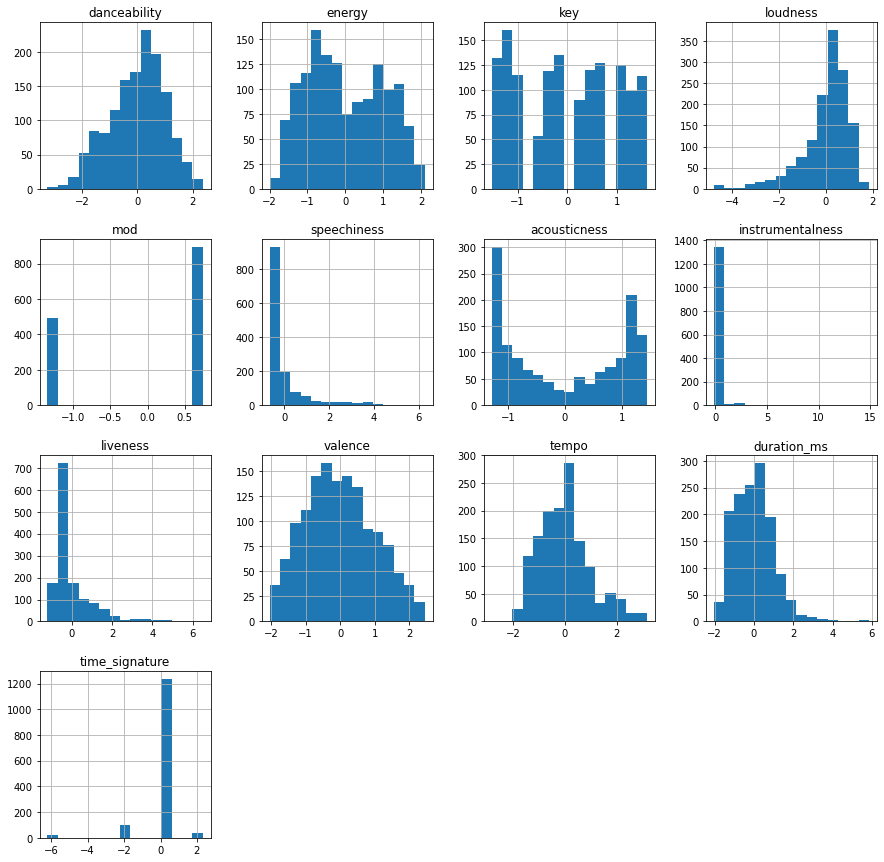

In [77]:
df_scaled_df.hist(bins=15,figsize=(15,15));

## Running Elbow and Silhouette Method to find how many clusters to have

In [78]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=40)
kmeans.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [79]:
kmeans1=KMeans(n_clusters=9)
kmeans1.fit(df)
print(kmeans1.inertia_)

99173725827.15387


In [80]:
K= range(2,20)


In [81]:
#gathering the k inertia values 
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

print(inertia)    

[1276307940546.8, 678430763416.3455, 416344240691.4638, 300997435165.27594, 210633941183.32, 159680323364.24335, 124879367074.85988, 98809269522.9613, 78215305914.53075, 64013669975.556076, 54323973196.806725, 45272461726.319115, 38841278609.5476, 34029866186.286522, 28883055863.578217, 25353961214.855007, 22152370446.17718, 19243079369.87322]


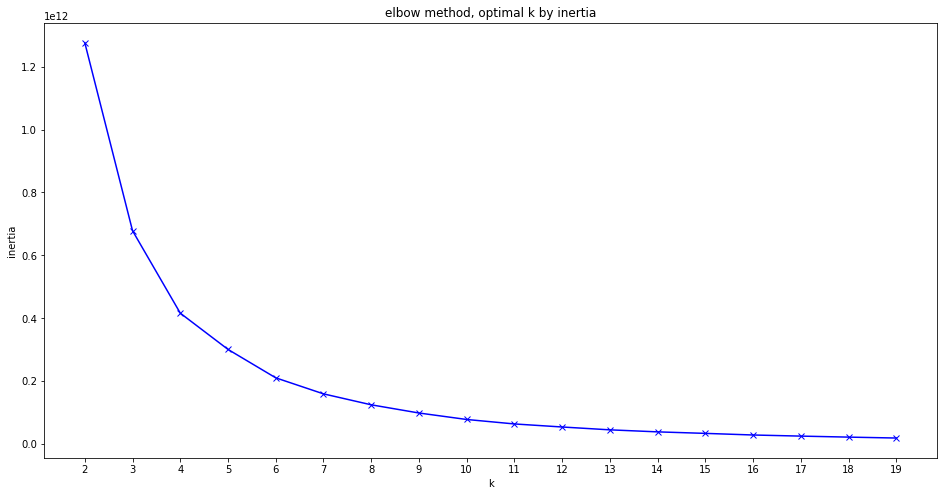

In [82]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

In [83]:
from sklearn.metrics import silhouette_score 
K= range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(df)
    silhouettes.append(silhouette_score(df, kmeans.predict(df)))

Text(0, 0.5, 'silhouette score')

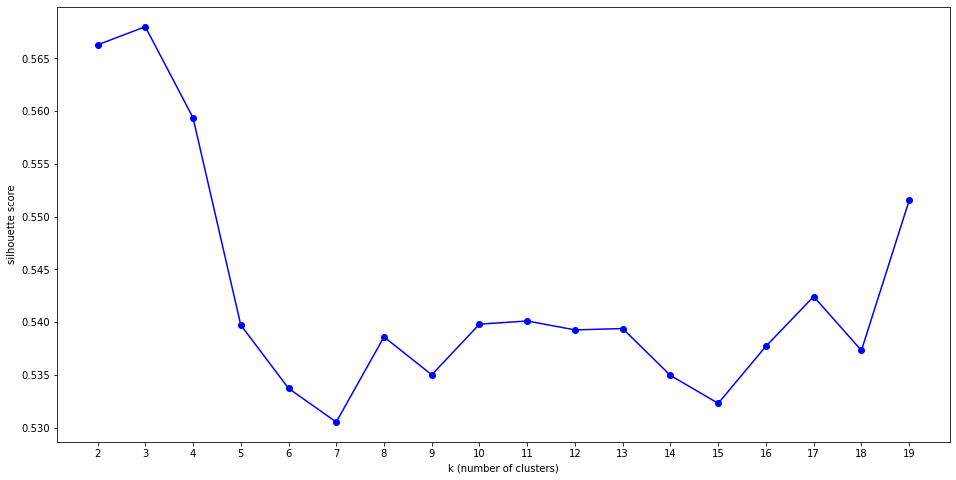

In [84]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

 Summary: we will use 8 clusters

In [85]:
kmeans=KMeans(n_clusters=8)

In [86]:
cluster_scaled=kmeans.fit(df_scaled_df)

In [87]:
cluster_scaled.cluster_centers_


array([[ 0.30933112,  0.60502439, -0.1911864 ,  0.50778267, -0.05680802,
         0.08122081, -0.63291142, -0.0799644 ,  2.37858925,  0.32204711,
         0.16501188,  0.06223908,  0.11798405],
       [-0.6022905 ,  0.62124557,  0.04139207,  0.4319188 ,  0.10239559,
        -0.18429993, -0.84134626, -0.07745228, -0.26206524, -0.7381821 ,
         0.23519381,  0.83555763,  0.11917184],
       [ 0.7599975 ,  0.91132645, -0.17838125,  0.65051261, -0.1796537 ,
        -0.07210345, -0.84421251, -0.08442717, -0.33144786,  0.92619349,
        -0.18339842,  0.21219447,  0.20098082],
       [-0.05625858, -0.69107733,  0.70551931, -0.0736444 , -0.2577454 ,
        -0.38436034,  0.86747439, -0.1480739 , -0.03661241,  0.09761028,
        -0.2331783 , -0.69819405,  0.29554881],
       [-0.90103796, -0.87137603, -0.25042028, -0.68433419,  0.03120551,
        -0.32203077,  0.93583058, -0.09979401, -0.2106672 , -0.43847056,
         0.18294429, -0.33126757, -2.79890368],
       [-0.42880949, -1.096974

In [88]:
cluster_scaled.labels_

array([6, 7, 1, ..., 5, 3, 4])

In [89]:
names_audio_features_df=df_scaled_df.copy()
names_audio_features_df['cluster']=cluster_scaled.labels_


In [90]:
names_audio_features_df

,danceability,energy,key,loudness,mod,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,-0.609178,1.177013,-1.521819,0.880334,0.741770,3.698407,-1.091965,-0.148678,-0.675160,0.788409,0.597586,1.296300,2.320390,6
1,0.733204,-0.013189,0.177155,-0.259119,-1.348126,-0.436262,-1.222019,11.104402,-0.517890,-0.611426,-0.872504,1.804708,0.187351,7
2,-0.962816,1.125638,-0.106007,1.037817,0.741770,-0.138971,-1.211158,-0.148678,1.393534,-0.591916,0.256346,0.280317,0.187351,1
3,-2.312416,-0.004626,1.026642,-0.311343,-1.348126,-0.565042,-1.295166,-0.068040,-0.637254,-0.869932,-0.040595,1.497659,-1.945688,1
4,0.783724,1.502392,-0.106007,0.980452,-1.348126,-0.378721,-0.892289,-0.091779,-0.437240,1.934615,-0.749454,0.141578,0.187351,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,0.798158,-1.049264,0.177155,-1.199688,0.741770,-0.429412,1.263210,-0.148678,-0.364654,-0.382185,-0.089245,-1.296656,0.187351,5
1385,-0.205020,-1.434581,1.592966,-1.290606,0.741770,-0.547232,1.107257,-0.148678,-0.372719,-0.211473,-1.271616,-1.407915,0.187351,3
1386,-0.948382,-1.659778,0.460317,-1.696220,0.741770,-0.533532,1.171309,-0.148678,-0.421109,-0.645568,1.145569,-1.099910,0.187351,5
1387,-0.414316,-1.383206,1.026642,-0.839804,0.741770,-0.196511,1.232576,-0.148678,0.199902,0.671349,1.438195,-1.339603,0.187351,3


In [91]:
df_scaled_df_c=df_scaled_df.copy()
df_scaled_df_c['cluster']=cluster_scaled.labels_

In [92]:
df_scaled_df_c.head()

,danceability,energy,key,loudness,mod,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,-0.609178,1.177013,-1.521819,0.880334,0.741770,3.698407,-1.091965,-0.148678,-0.675160,0.788409,0.597586,1.296300,2.320390,6
1,0.733204,-0.013189,0.177155,-0.259119,-1.348126,-0.436262,-1.222019,11.104402,-0.517890,-0.611426,-0.872504,1.804708,0.187351,7
2,-0.962816,1.125638,-0.106007,1.037817,0.741770,-0.138971,-1.211158,-0.148678,1.393534,-0.591916,0.256346,0.280317,0.187351,1
3,-2.312416,-0.004626,1.026642,-0.311343,-1.348126,-0.565042,-1.295166,-0.068040,-0.637254,-0.869932,-0.040595,1.497659,-1.945688,1
4,0.783724,1.502392,-0.106007,0.980452,-1.348126,-0.378721,-0.892289,-0.091779,-0.437240,1.934615,-0.749454,0.141578,0.187351,2


In [93]:
df_scaled_df_c['cluster'].value_counts()

2    313
3    276
5    244
1    219
0    123
4    100
6     97
7     17
Name: cluster, dtype: int64

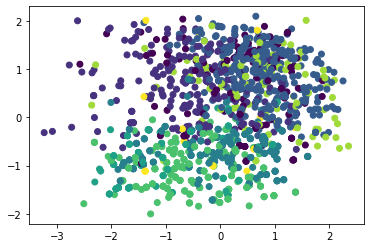

In [94]:
plt.scatter(df_scaled_df_c.iloc[:,0],df_scaled_df_c.iloc[:,1],c=df_scaled_df_c.iloc[:,13]);



## Updating the Recommender with Spotify Data to suggest songs from the same cluster

In [95]:

while True: 
        song = input("Enter your song here: ").lower()
        mic_check = top100_table[top100_table['song'].str.lower().str.contains(song)]
        index = mic_check.index.to_list()
        top100_table.song[index].values[0]

        if len(mic_check) == 0:
                 print("That ain't it chief, try again")
        else: 
            answer=input("I think we're onto something, did you mean " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + "? ")
  
            if answer.lower() == "yes":
                suggestion=top100_table.sample().index.to_list()
                print("Seems like you got good taste in music! Try this song out by " + top100_table['artist'][suggestion].item() + " it's called " + top100_table['song'][suggestion].item())
                break
            else: 
                input("Ok, let's try that again now")

Enter your song here: love
I think we're onto something, did you mean My Little Love by Adele? yes
Seems like you got good taste in music! Try this song out by Taylor Swift it's called Message In A Bottle (Taylor's Version) (From The Vault)


In [96]:
kmeans=KMeans(n_clusters=8)


In [97]:
numeric=names_audio_features_df2.select_dtypes([np.number])


In [98]:
cluster_scaled=kmeans.fit(numeric)


In [99]:
cluster_scaled.labels_


array([2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 5, 7, 2, 7, 7, 7, 7, 0, 6, 7, 0, 2,
       0, 6, 7, 2, 7, 0, 5, 6, 0, 7, 0, 2, 0, 6, 6, 6, 6, 0, 1, 0, 0, 7,
       0, 7, 7, 7, 6, 0, 7, 3, 7, 7, 0, 0, 2, 1, 1, 7, 2, 0, 7, 2, 1, 0,
       0, 6, 1, 7, 0, 7, 0, 7, 7, 6, 0, 2, 0, 0, 6, 7, 6, 2, 6, 7, 7, 6,
       6, 7, 7, 6, 7, 2, 0, 0, 0, 0, 6, 7, 0, 7, 6, 2, 4, 0, 0, 1, 7, 3,
       7, 6, 2, 7, 6, 2, 1, 6, 7, 1, 1, 6, 2, 7, 2, 0, 0, 0, 6, 7, 7, 0,
       0, 0, 7, 0, 0, 0, 7, 6, 6, 0, 7, 5, 1, 6, 0, 2, 7, 7, 6, 0, 4, 2,
       0, 7, 6, 1, 6, 6, 0, 7, 7, 2, 6, 3, 2, 7, 1, 7, 6, 6, 0, 7, 6, 3,
       7, 1, 6, 0, 0, 7, 7, 6, 7, 3, 2, 3, 6, 0, 2, 6, 0, 2, 2, 0, 6, 7,
       7, 0, 6, 6, 2, 0, 0, 0, 7, 0, 1, 7, 6, 5, 4, 7, 2, 3, 2, 7, 4, 0,
       0, 6, 1, 0, 7, 7, 0, 1, 0, 7, 0, 0, 2, 0, 7, 6, 2, 7, 6, 6, 1, 2,
       6, 7, 7, 6, 2, 2, 5, 2, 0, 2, 2, 2, 7, 6, 7, 2, 2, 6, 1, 6, 0, 2,
       7, 2, 7, 0, 6, 0, 0, 0, 0, 0, 3, 0, 0, 7, 7, 7, 5, 7, 6, 1, 0, 7,
       6, 0, 2, 6, 2, 2, 0, 0, 0, 0, 7, 0, 0, 7, 0,

In [100]:
names_audio_features_df3=names_audio_features_df2.copy()


In [101]:
names_audio_features_df2['cluster']=cluster_scaled.labels_


In [102]:
names_audio_features_df2

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,No Brainer,5WvAo7DNuPRmk4APhdPzi8,DJ Khaled,0.552,0.760,0,-4.706,1,0.3420,0.073300,...,0.639,135.702,audio_features,5WvAo7DNuPRmk4APhdPzi8,spotify:track:5WvAo7DNuPRmk4APhdPzi8,https://api.spotify.com/v1/tracks/5WvAo7DNuPRm...,https://api.spotify.com/v1/audio-analysis/5WvA...,260000,5,2
1,Magic,23khhseCLQqVMCIT1WMAns,Coldplay,0.738,0.482,6,-8.917,0,0.0402,0.026600,...,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4,1
2,Heroes (we could be),3zU9rdflI65tK4dkkNSp77,Alesso,0.503,0.748,5,-4.124,1,0.0619,0.030500,...,0.356,125.896,audio_features,3zU9rdflI65tK4dkkNSp77,spotify:track:3zU9rdflI65tK4dkkNSp77,https://api.spotify.com/v1/tracks/3zU9rdflI65t...,https://api.spotify.com/v1/audio-analysis/3zU9...,210013,4,0
3,The House of the Rising Sun,3TETmhGNWOcquUTtcr6RIR,The Animals,0.316,0.484,9,-9.110,0,0.0308,0.000334,...,0.299,117.363,audio_features,3TETmhGNWOcquUTtcr6RIR,spotify:track:3TETmhGNWOcquUTtcr6RIR,https://api.spotify.com/v1/tracks/3TETmhGNWOcq...,https://api.spotify.com/v1/audio-analysis/3TET...,269907,3,2
4,Mayores,2AY1UAimvTqjJC8vDJsOyy,Becky G,0.745,0.836,5,-4.336,0,0.0444,0.145000,...,0.874,96.993,audio_features,2AY1UAimvTqjJC8vDJsOyy,spotify:track:2AY1UAimvTqjJC8vDJsOyy,https://api.spotify.com/v1/tracks/2AY1UAimvTqj...,https://api.spotify.com/v1/audio-analysis/2AY1...,203187,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,One Dance,1zi7xx7UVEFkmKfv06H8x0,Drake,0.792,0.625,1,-5.609,1,0.0536,0.007760,...,0.370,103.967,audio_features,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0,https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...,https://api.spotify.com/v1/audio-analysis/1zi7...,173987,4,6
696,rockstar (feat. 21 Savage),0e7ipj03S05BNilyu5bRzt,Post Malone,0.585,0.520,5,-6.136,0,0.0712,0.124000,...,0.129,159.801,audio_features,0e7ipj03S05BNilyu5bRzt,spotify:track:0e7ipj03S05BNilyu5bRzt,https://api.spotify.com/v1/tracks/0e7ipj03S05B...,https://api.spotify.com/v1/audio-analysis/0e7i...,218147,4,7
697,Dance Monkey,5ZULALImTm80tzUbYQYM9d,Tones And I,0.824,0.588,6,-6.400,0,0.0924,0.692000,...,0.513,98.027,audio_features,5ZULALImTm80tzUbYQYM9d,spotify:track:5ZULALImTm80tzUbYQYM9d,https://api.spotify.com/v1/tracks/5ZULALImTm80...,https://api.spotify.com/v1/audio-analysis/5ZUL...,209438,4,0
698,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,0.514,0.730,1,-5.934,1,0.0598,0.001460,...,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,0


# FINAL MVP 

In [104]:

#get song input
song_choice = input("Enter your song here!: ").lower().replace(" ", '')
#match song with top100
match = top100_table[top100_table['song'].str.lower().str.replace(" ","").str.contains(song_choice)]
#get the index of the song in the entry
index = match.index.tolist()
#check for song in Top 100

if len(match) == 0:
    print("Hmmm, we couldn't find that in the top 100. Let us check our spotify library")
    #Go to spotify for similar song
    match = names_audio_features_df2[names_audio_features_df2['song_name'].str.lower().str.replace(" ","").str.contains(song_choice)]
    #get the index of the song in the entry
    index = match.index.tolist()
    #get suggestion from spotify
    if len(match) == 0:
        print("Ah dammit! It's not even in our spotify library, go find another recommender!")
    else:
        answer = input("Is this the song you want ?"+names_audio_features_df2.song_name[index].values[0] +"'by'"+ names_audio_features_df2.song_artist[index].values[0]+"? ")
        if answer.lower() == 'yes':
            cluster = names_audio_features_df2.cluster[index].values[0]
            suggestion = names_audio_features_df2[names_audio_features_df2['cluster'] == cluster].sample().index.tolist()
            print('You got good taste! You might also like:'+names_audio_features_df2['song_name'][suggestion].item()+ "'by'"+names_audio_features_df2['song_artist'][suggestion].item())
        else:
            print('Alright go find another recommender we cant help you here')
#code to run when song is in Top100 database
else:
    answer = input("\n Would it be  " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + '? (Yes/No)')
    if answer.lower() == 'yes':
        suggestion = top100_table.sample().index.tolist()
        print("Your song is in the Top 100! You might also like: " + top100_table['song'][suggestion].item() + " 'by' " + top100_table['artist'][suggestion].item())

    else:
        input("nah, let's try that again")



Enter your song here!: yellow
Hmmm, we couldn't find that in the top 100. Let us check our spotify library
Is this the song you want ?Bodak Yellow'by'Cardi B? yes
You got good taste! You might also like:Havana (feat. Young Thug)'by'Camila Cabello


In [113]:
#get song input
song_choice = input("Enter your song here!: ").lower().replace(" ", '')
#match song with top100
match = top100_table[top100_table['song'].str.lower().str.replace(" ","").str.contains(song_choice)]
#get the index of the song in the entry
index = match.index.tolist()
#check for song in Top 100

if len(match) == 0:
    print("Hmmm, we couldn't find that in the top 100. Let us check our spotify library")
    #Go to spotify for similar song
    match = names_audio_features_df2[names_audio_features_df2['song_name'].str.lower().str.replace(" ","").str.contains(song_choice)]
    #get the index of the song in the entry
    index = match.index.tolist()
    #get suggestion from spotify
    if len(match) == 0:
        print("Ah dammit! It's not even in our spotify library, go find another recommender!")
    else:
        answer = input("Is this the song you want ? "+names_audio_features_df2.song_name[index].values[0] +"'by'"+ names_audio_features_df2.song_artist[index].values[0]+"? ")
        if answer.lower() == 'yes':
            cluster = names_audio_features_df2.cluster[index].values[0]
            suggestion = names_audio_features_df2[names_audio_features_df2['cluster'] == cluster].sample().index.tolist()
            print('You got good taste! You might also like:'+names_audio_features_df2['song_name'][suggestion].item()+ "'by'"+names_audio_features_df2['song_artist'][suggestion].item())
        else:
            print('Alright go find another recommender we cant help you here')
#code to run when song is in Top100 database
else:
    answer = input("\n Would it be  " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + '? (Yes/No)')
    if answer.lower() == 'yes':
        suggestion = top100_table.sample().index.tolist()
        print("Your song is in the Top 100! You might also like: " + top100_table['song'][suggestion].item() + " 'by' " + top100_table['artist'][suggestion].item())

    else:
        input("nah, let's try that again ")


Enter your song here!: jump
Hmmm, we couldn't find that in the top 100. Let us check our spotify library
Is this the song you want ? Jumpman'by'Drake? yes
You got good taste! You might also like:Beautiful People (feat. Khalid)'by'Ed Sheeran


# Final Final MVP

In [135]:
#get song input
song_choice = input("Enter your song here!: ").lower().replace(" ", '')
#match song with top100
match = top100_table[top100_table['song'].str.lower().str.replace(" ","").str.contains(song_choice)]
#get the index of the song in the entry
index = match.index.tolist()
#check for song in Top 100

 
if len(match) == 0:
    print("Hmmm, we couldn't find that in the top 100. Let us check our spotify library")
    #Go to spotify for similar song
    match = names_audio_features_df2[names_audio_features_df2['song_name'].str.lower().str.replace(" ","").str.contains(song_choice)]
    #get the index of the song in the entry
    index = match.index.tolist()
    #get suggestion from spotify
    if len(match) == 0:
        print("Ah dammit! It's not even in our spotify library, go find another recommender!")
    else:
        answer = input("Is this the song you want? "+names_audio_features_df2.song_name[index].values[0] +" by "+ names_audio_features_df2.song_artist[index].values[0]+"? ")
        if answer.lower() == 'yes':
            cluster = names_audio_features_df2.cluster[index].values[0]
            suggestion = names_audio_features_df2[names_audio_features_df2['cluster'] == cluster].sample().index.tolist()
            print('You got good taste! You might also like:'+names_audio_features_df2['song_name'][suggestion].item()+ " by "+names_audio_features_df2['song_artist'][suggestion].item())
        else:
            print('Alright go find another recommender we cant help you here')
#code to run when song is in Top100 database
else:
    answer = input("\n Can you confirm it's " + top100_table.song[index].values[0] + " by " + top100_table.artist[index].values[0] + '? (Yes/No) ')
    if answer.lower() == 'yes':
        suggestion = top100_table.sample().index.tolist()
        print("Your song is in the Top 100! You might also like: " + top100_table['song'][suggestion].item() + " by " + top100_table['artist'][suggestion].item())
    else:
        print("Ah sorry to hear that, please restart the program and try listening to better music! ")


Enter your song here!: jumpman
Hmmm, we couldn't find that in the top 100. Let us check our spotify library
Is this the song you want? Jumpman by Drake? no
Alright go find another recommender we cant help you here


In [122]:

names_audio_features_df2[names_audio_features_df2['song_name']=='Jumpman']['cluster']



284    0
Name: cluster, dtype: int32

In [134]:
names_audio_features_df2[names_audio_features_df2['song_name']=='ME! (feat. Brendon Urie of Panic! At The Disco)']['cluster']


100    0
Name: cluster, dtype: int32